Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart). Use appropriate, complete and professional labeling.

In [113]:
#Importing sales record dataset
sales_record = pd.read_csv("sales_record.csv")
sales_record.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


I want to do analysis on the comparison between total sale orders per region for orders that were made from 2010-2017.

In [114]:
#preparing the data

#Extracting only the year from the 'Order Date' column in the sales_record dataset
sales_record['year'] = pd.DatetimeIndex(sales_record['Order Date']).year

#Grouping the data by Region and Year to find the total Units sold in each region over the years
sales_grouped = sales_record.groupby(['Region','year'])['Units Sold'].sum()
sales_grouped

Region                             year
Asia                               2010     467129
                                   2011     384165
                                   2012     515244
                                   2013     474400
                                   2014     491147
                                   2015     520887
                                   2016     508427
                                   2017     258637
Australia and Oceania              2010     277143
                                   2011     283832
                                   2012     364343
                                   2013     257966
                                   2014     237357
                                   2015     290790
                                   2016     255186
                                   2017     145169
Central America and the Caribbean  2010     333103
                                   2011     426646
                                   2012   

### Side-by-Side Bar Plot

Text(0.5, 1.0, 'Total Units Sold per Region from 2010-2017')

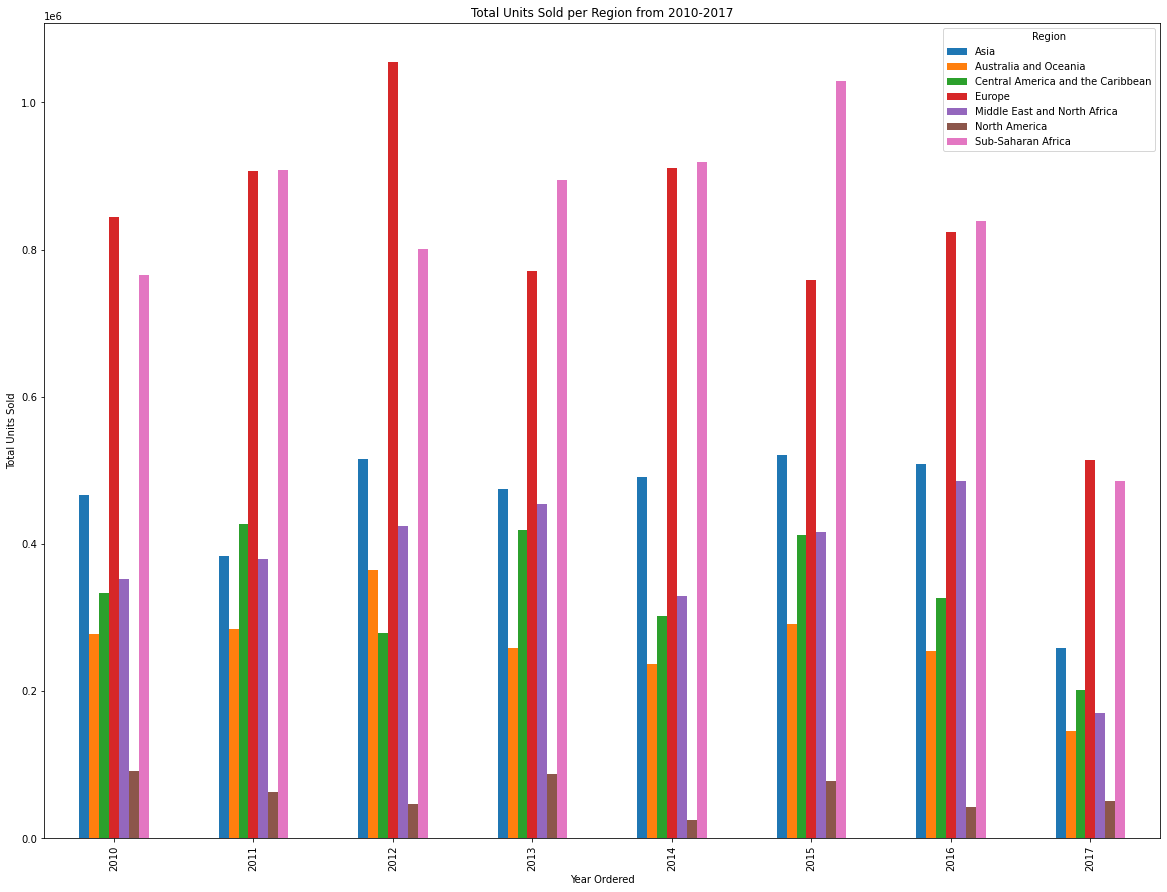

In [127]:
#side-by-side bar chart grouped on year and Region
#Values shown are sums of Units Sold
sales_record.groupby(['year','Region'])['Units Sold'].sum().unstack().plot(kind='bar', stacked=False,figsize=(20,15))
plt.ylabel('Total Units Sold')
plt.xlabel('Year Ordered')
plt.title('Total Units Sold per Region from 2010-2017')

### Pie Chart

Text(0.5, 1.0, 'Percentage of Total Units Sold by Region and Year Ordered')

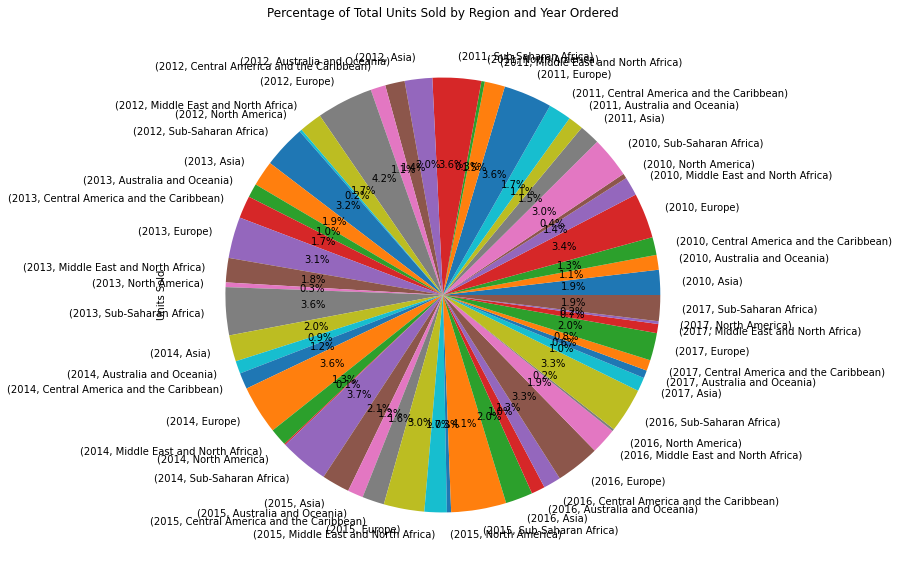

In [129]:
#Pie chart with year and Region groupings
sales_record.groupby(['year','Region']).sum().plot(kind='pie',y='Units Sold',figsize=(30,10), autopct='%1.1f%%',legend=False)
#title for pie chart
plt.title('Percentage of Total Units Sold by Region and Year Ordered')

Text(0.5, 1.0, 'Percentage of Total Units Sold by Region')

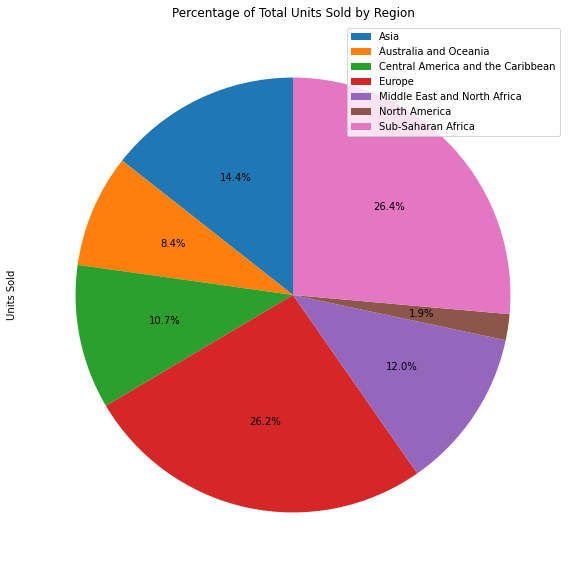

In [137]:
#pie chart with only Region grouping -- less slices and easier to view
#start angle at 90 degrees -- 12 o'clock
#No labels -- just using legend
sales_record.groupby(['Region']).sum().plot(kind='pie',y='Units Sold',figsize=(20,10), autopct='%1.1f%%',legend=True,startangle=90,labels=None)
#title for pie chart
plt.title('Percentage of Total Units Sold by Region')

### Line Chart

In [106]:
# remove special characters from dataset to avoid key errors
sales_record.columns = sales_record.columns.str.replace(' ', '')
sales_record.columns

Index(['Region', 'Country', 'ItemType', 'SalesChannel', 'OrderPriority',
       'OrderDate', 'OrderID', 'ShipDate', 'UnitsSold', 'UnitPrice',
       'UnitCost', 'TotalRevenue', 'TotalCost', 'TotalProfit', 'year'],
      dtype='object')

In [107]:
#creating dataframe sorted by Region then year and summing units sold over the groups
df_new = sales_record.groupby(['Region', 'year'])['UnitsSold'].sum()

Text(0.5, 1.0, 'Change in Total Units Sold Per Region from 2010-2017')

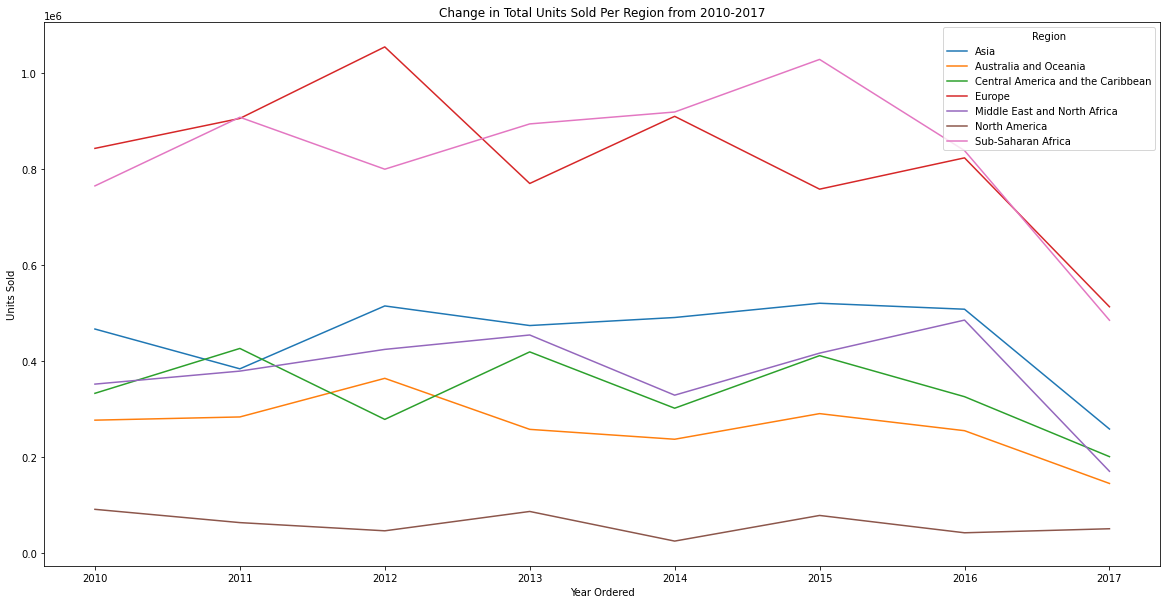

In [111]:
#Unstack the series and make a line plot
df_new.unstack().T.plot(kind='line',figsize=(20,10))

#labels and title
plt.ylabel('Units Sold')
plt.xlabel('Year Ordered')
plt.title('Change in Total Units Sold Per Region from 2010-2017')

### Extra Practice

Text(0.5, 1.0, 'Total Units Sold per Region from 2010-2017')

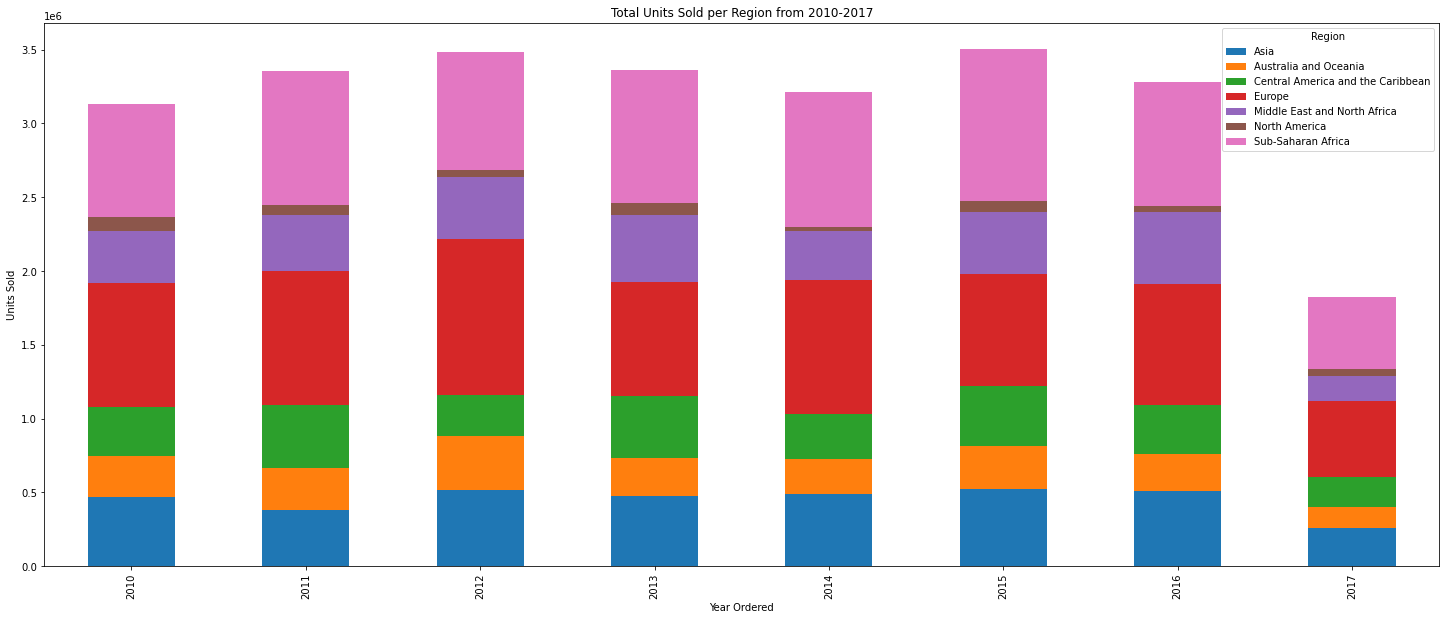

In [119]:
#stacked bar chart grouped on year and Region
#Values shown are sums of Units Sold
sales_record.groupby(['year','Region'])['Units Sold'].sum().unstack().plot(kind='bar', stacked=True,figsize=(25,10))
plt.ylabel('Units Sold')
plt.xlabel('Year Ordered')
plt.title('Total Units Sold per Region from 2010-2017')